In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier

In [3]:
path=r"C:\Users\osmai\Downloads\archive (8)\drug200.csv"
df=pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.shape

(200, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [195]:
columns=df.columns.tolist()
columns

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

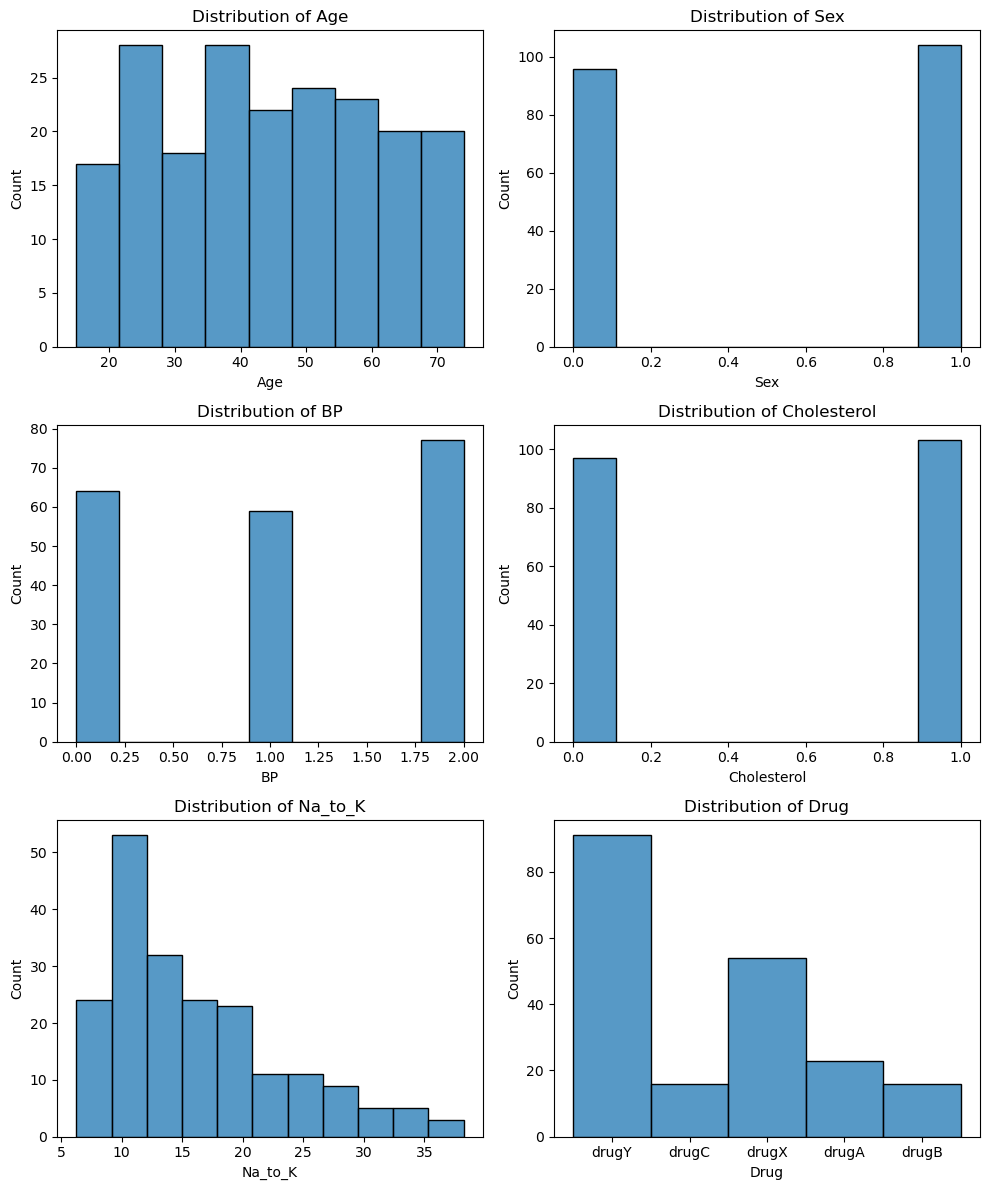

In [203]:
fig,axes=plt.subplots(3,2,figsize=(10,12))
axes=axes.ravel()
for i,j in enumerate(columns):
    sns.histplot(df[j], ax=axes[i])
    axes[i].set_title(f'Distribution of {j}')
plt.tight_layout()
plt.show()


## we are going to clean our dataset.

In [65]:
df['Sex']=df['Sex'].map({'F':0,'M':1})
df['BP']=df['BP'].map({'LOW':0,'NORMAL':1,'HIGH':2})
df['Cholesterol']=df['Cholesterol'].map({'HIGH':1,'NORMAL':0})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


In [111]:
X=df.drop('Drug',axis=1)
X
y=df['Drug']

In [113]:
from sklearn.model_selection import train_test_split



In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_test.shape


(40,)

In [175]:
Tree1=DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
Tree1.fit(X_train,y_train)
y_predict=Tree1.predict(X_test)
print(y_predict.shape,y_test.shape)



(40,) (40,)


In [177]:
pd.crosstab(y_test,y_predict,rownames=['actual'],colnames=['prediction'])

prediction,drugA,drugB,drugC,drugX,drugY
actual,,,,,
drugA,5,0,0,0,0
drugB,0,3,0,0,0
drugC,0,0,3,0,0
drugX,0,0,0,10,0
drugY,0,0,0,0,19


## Our algorithm is able to perfectly classify all the different drugs into their respective categories.


In [207]:
from sklearn.tree import plot_tree

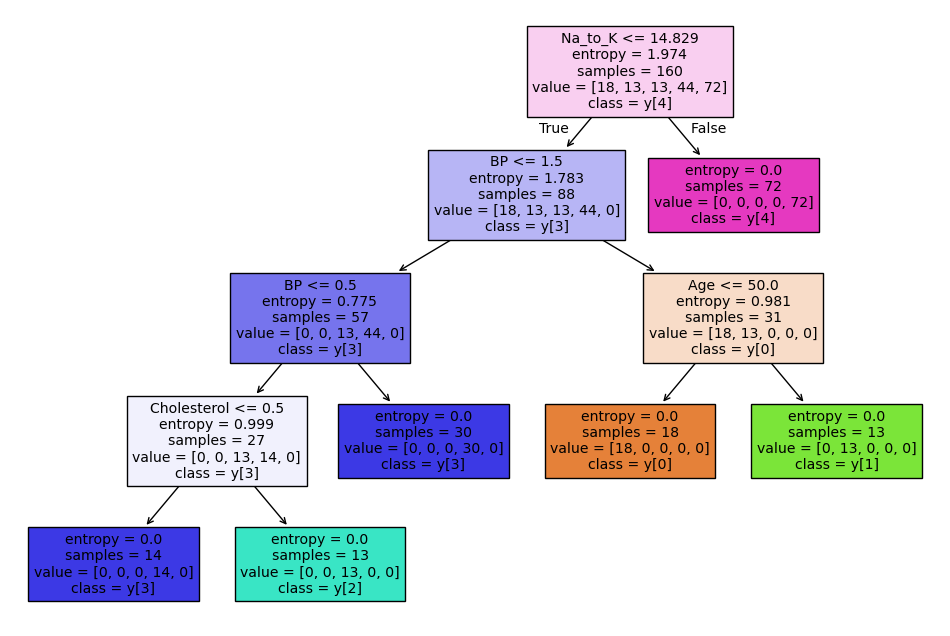

In [209]:
plt.figure(figsize=(12, 8))
plot_tree(Tree1, feature_names=X.columns, class_names=True, filled=True)
plt.show()

##  Conclusions Based on the Decision Tree Model

1. **The Na_to_K (Sodium-to-Potassium) ratio is the strongest predictor of drug response.**  
   The root split of the tree shows that patients with **Na_to_K > 14.829** are consistently classified as **Drug Y**, indicating a clear and dominant pattern.

2. **Blood Pressure is the second most influential feature in the model.**  
   Among patients with lower Na_to_K values:
   - Patients with **high BP (BP > 1.5)** are classified as **Drug A**.  
   - Patients with **low or normal BP** follow additional splits involving cholesterol and age.

3. **Cholesterol levels are key to distinguishing between Drug C and Drug X** for individuals with lower blood pressure:
   - **Cholesterol ≤ 0.5 → Drug X**  
   - **Cholesterol > 0.5 → Drug C**

4. **Age helps separate Drug B from Drug A** among patients with elevated blood pressure:
   - **Age ≤ 50 → Drug B**  
   - **Age > 50 → Drug A**

5. **All terminal nodes (leaf nodes) show entropy = 0**, which means the model:
   - Achieves perfect class separation  
   - Has 100% purity at each leaf  
   - Generates highly interpretable and deterministic treatment rules

6. The decision tree provides **clear and interpretable clinical rules**, such as:
   - **High Na_to_K → Drug Y**  
   - **Low Na_to_K + Low BP + High Cholesterol → Drug C**  
   - **Low Na_to_K + Low BP + Low Cholesterol → Drug X**  
   - **Low Na_to_K + High BP + Younger age → Drug B**  
   - **Low Na_to_K + High BP + Older age → Drug A**

These findings show how electrolyte balance, blood pressure, cholesterol, and age interact to determine the most appropriate drug for patients with this illness.

##  Cross-validation to Check for Overfitting

To ensure that our Decision Tree model is not overfitting the training data, we apply **k-fold cross-validation**.  
This method divides the dataset into *k* subsets (folds), trains the model on `k-1` folds, and evaluates it on the remaining fold.  
The process is repeated `k` times to obtain a more reliable performance estimate.

Below, we compute the cross-validation accuracy scores and analyze them to confirm the model’s generalization capability.

In [272]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree1=tree.fit(X,y)
tree1.predict(X)

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [250]:
from sklearn.model_selection import KFold,cross_val_score


In [274]:
scores=cross_val_score(tree1,X,y,scoring='accuracy',cv=cv)
scores

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 0.95, 1.  , 1.  ])

In [276]:
cv=KFold(n_splits=10,shuffle=True)
score=np.mean(cross_val_score(tree1,X,y,scoring='accuracy',cv=cv))
score

0.99

In [286]:
for i in range(1,11):
    tree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    tree1=tree.fit(X,y)
    cv=KFold(n_splits=10,shuffle=True)
    scores=cross_val_score(tree1,X,y,scoring='accuracy',cv=cv)
    score=np.mean(scores)
    print('Score for max_depth=',i,' is: ', score)
    print(tree1.feature_importances_)
    

Score for max_depth= 1  is:  0.72
[0. 0. 0. 0. 1.]
Score for max_depth= 2  is:  0.835
[0.         0.         0.34027178 0.         0.65972822]
Score for max_depth= 3  is:  0.8950000000000001
[0.10584887 0.         0.34160198 0.         0.55254915]
Score for max_depth= 4  is:  0.99
[0.09673187 0.         0.31217904 0.08613222 0.50495687]
Score for max_depth= 5  is:  0.99
[0.09673187 0.         0.31217904 0.08613222 0.50495687]
Score for max_depth= 6  is:  0.99
[0.09673187 0.         0.31217904 0.08613222 0.50495687]
Score for max_depth= 7  is:  0.99
[0.09673187 0.         0.31217904 0.08613222 0.50495687]
Score for max_depth= 8  is:  0.99
[0.09673187 0.         0.31217904 0.08613222 0.50495687]
Score for max_depth= 9  is:  0.985
[0.09673187 0.         0.31217904 0.08613222 0.50495687]
Score for max_depth= 10  is:  0.99
[0.09673187 0.         0.31217904 0.08613222 0.50495687]


## Final Conclusions

1. **The Na_to_K (Sodium-to-Potassium) ratio is the dominant predictor**, consistently appearing as the first split in the decision tree and receiving the highest feature importance across all model depths. High Na_to_K values strongly indicate the prescription of *Drug Y*, confirming its strong predictive power.

2. **Blood Pressure and Cholesterol serve as important secondary predictors.**  
   - Patients with elevated blood pressure tend to receive **Drug A**.  
   - Cholesterol levels help distinguish between **Drug C** and **Drug X** for patients with normal or low blood pressure.

3. **Age contributes to refined decision boundaries**, particularly separating **Drug A** from **Drug B** among patients with high blood pressure.

4. **Cross-validation results show stable performance across folds**, providing evidence that the model **is not overfitting**. The accuracy remains consistent, and the variance is low, indicating good generalization.

5. **The max_depth evaluation demonstrates that increasing tree depth beyond a certain point does not significantly improve accuracy.**  
   This means the model reaches optimal complexity early, and deeper trees offer no additional benefit while adding unnecessary complexity.

6. **All terminal leaf nodes show entropy = 0**, which means the model achieves perfect class purity at every leaf.  
   This confirms excellent separation among the five drug classes.

7. **Overall, the Decision Tree classifier performs effectively for this multiclass drug prediction problem**, offering:
   - High interpretability  
   - Clear decision rules  
   - Strong predictive performance  
   - No signs of overfitting  

8. This makes the model suitable for **predicting the most appropriate drug** for new patients with similar characteristics, combining accuracy, transparency, and clinically meaningful insights.
